# Affair Dataset 

Use an inbuilt dataset, preferably the one you used for the first assignment ({{Python] Loading Data). Build on the work done so far by adding at least one hypothesis test and a regression model on the dataset. Do ensure you provide the context of the analysis and also the interpretation of the analysis results.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import random
import math

In [91]:
import statsmodels.api as sm
fair = sm.datasets.fair

print(fair.DESCRLONG)

Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.


In [92]:
print(fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [93]:
dataset_fair = fair.load_pandas()

In [94]:
df_fair = dataset_fair.data
df_fair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [95]:
df_fair.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [96]:
df_fair.shape

(6366, 9)

In [97]:
df_fair.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [98]:
df_fair[df_fair.duplicated()]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
175,3.0,27.0,9.0,2.0,2.0,12.0,5.0,2.0,1.333333
472,4.0,27.0,9.0,2.0,3.0,12.0,2.0,2.0,0.388889
569,2.0,27.0,6.0,1.0,2.0,12.0,3.0,2.0,0.583333
692,3.0,22.0,2.5,1.0,3.0,12.0,3.0,2.0,3.200000
804,4.0,22.0,2.5,0.0,2.0,12.0,3.0,4.0,4.900000
...,...,...,...,...,...,...,...,...,...
6354,5.0,42.0,23.0,4.0,4.0,12.0,3.0,5.0,0.000000
6355,4.0,27.0,6.0,0.0,3.0,12.0,3.0,4.0,0.000000
6359,4.0,22.0,2.5,0.0,3.0,16.0,5.0,5.0,0.000000
6360,5.0,22.0,2.5,0.0,2.0,14.0,3.0,3.0,0.000000


In [99]:
df_fair.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


# Point Estimate

In [100]:
df_fair["affairs"].sum()

4490.4101715

In [102]:
df_fair["affairs"].mean()

0.7053738880772903

In [103]:
df_fair["affairs"].median()

0.0

# Confidence Interval


In [104]:
sample_size = 100000
sample = np.random.choice(a = df_fair["affairs"], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)
print("z critical value: "+ str(z_critical))

pop_stdev = df_fair["affairs"].std()

margin_of_error = z_critical * pop_stdev/math.sqrt(sample_size)

confidence_interval = (sample_mean - margin_of_error , sample_mean + margin_of_error)
print("Confidence interval: "+ str(confidence_interval))

z critical value: 1.959963984540054
Confidence interval: (0.6778963921622638, 0.705209194189736)


# Hypothesis Test

## Chi-Square Test of Independence





In [109]:
pd.crosstab(df_fair.educ, df_fair.affairs, margins = True)

affairs,0.0,0.0434783,0.0606061,0.0769231,0.1111111,0.1521739,0.1666666,0.2121212,0.2434782,0.2692307,...,16.7999878,17.9199982,24.0,24.5,25.5999908,26.8799896,38.3999939,39.1999817,57.5999908,All
educ,,,,,,,,,,,,,,,,,,,,,
9.0,27,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,48
12.0,1361,7,6,11,3,27,23,24,0,16,...,2,1,1,0,1,2,0,0,0,2084
14.0,1469,8,10,7,13,16,15,26,0,19,...,5,3,1,1,1,0,1,1,1,2277
16.0,844,2,4,1,7,5,6,9,1,6,...,1,3,0,1,0,0,0,0,0,1117
17.0,370,3,1,2,3,3,4,4,0,3,...,3,1,0,0,0,1,0,0,0,510
20.0,242,2,0,3,3,5,0,2,0,1,...,1,0,0,0,0,0,0,0,0,330
All,4313,22,22,25,29,57,49,66,1,46,...,12,8,2,2,2,3,1,1,1,6366


In [110]:
obs = pd.crosstab(df_fair.educ, df_fair.affairs, margins = False)

In [111]:
stats.chi2_contingency(observed = obs)

(440.8153016311418,
 0.016914927997603493,
 380,
 array([[3.25202639e+01, 1.65881244e-01, 1.65881244e-01, 1.88501414e-01,
         2.18661640e-01, 4.29783223e-01, 3.69462771e-01, 4.97643732e-01,
         7.54005655e-03, 3.46842601e-01, 7.54005655e-03, 1.50801131e-01,
         3.16682375e-01, 5.42884072e-01, 1.73421301e-01, 3.99622997e-01,
         3.16682375e-01, 6.48444863e-01, 9.04806786e-02, 7.54005655e-03,
         5.35344015e-01, 3.39302545e-01, 4.67483506e-01, 1.28180961e-01,
         2.41281810e-01, 2.86522149e-01, 5.27803959e-01, 1.73421301e-01,
         5.42884072e-01, 2.94062205e-01, 8.89726673e-01, 3.54382658e-01,
         1.28180961e-01, 1.80961357e-01, 1.43261074e-01, 4.44863336e-01,
         4.75023563e-01, 7.54005655e-02, 3.61922714e-01, 2.03581527e-01,
         1.05560792e-01, 3.01602262e-02, 1.05560792e-01, 5.27803959e-02,
         2.86522149e-01, 1.20640905e-01, 4.29783223e-01, 8.29406221e-02,
         7.54005655e-03, 6.03204524e-02, 2.26201697e-02, 2.33741753e-01,
  

# Linear Regression Model

In [116]:
df_fair.head()
df_fair.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [115]:
df_fair.educ.unique()

array([17., 14., 16., 12., 20.,  9.])

In [117]:
df_fair[["educ","affairs"]].value_counts()

educ  affairs  
14.0  0.000000     1469
12.0  0.000000     1361
16.0  0.000000      844
17.0  0.000000      370
20.0  0.000000      242
                   ... 
14.0  57.599991       1
      39.199982       1
      38.399994       1
      25.599991       1
20.0  16.799988       1
Length: 295, dtype: int64

<AxesSubplot:xlabel='educ', ylabel='affairs'>

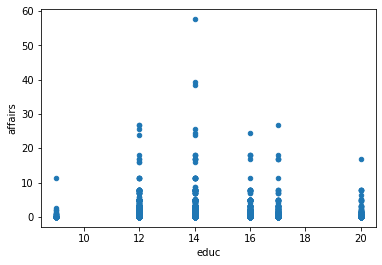

In [119]:
df_fair.plot.scatter(x="educ", y="affairs")

# Answers to Question


Looking at the p-value result in the Chi-Square Test of Observance, it is less than 0.05 and thus rejects the null hypothesis that both the education of the marital spouse and the time spent during affairs outside of marriage are independent. Also, the regression model says that most of the affairs come between 12 and 18, 14 having the most outliers. 12 in education is most highschool, 16 and above is college graduate and above.